In [4]:
from astropy.table import Table, vstack, join, hstack, Column
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import numpy as np
import pandas as pd

In [5]:
dr14 = Table.read('allStar-l31c.2.fits', hdu=1)
#Reading in the All Star file.

In [6]:
ok = (dr14['LOCATION_ID'] == 5068)
ok2 = (dr14['LOCATION_ID'] == 5131)
#Creating a mask for the location ID's I am interested in.

In [7]:
pal5_a = dr14[ok]
pal5_b = dr14[ok2]
pal5 = vstack([pal5_a, pal5_b])
#Applying the masks and stacking the two tables together

In [8]:
target_a = (pal5_a['APOGEE2_TARGET1'] & 2**19 != 0)
target_b = (pal5_b['APOGEE2_TARGET1'] & 2**19 != 0)
target = (pal5['APOGEE2_TARGET1'] & 2**19 != 0)
#Applying a bit mask to the tables that gives out the potential stream candidates.

In [9]:
candidates = pal5[target]
#All of the stars from the pal5 areas that have been marked as candidates

In [10]:
fp = pal5['FPARAM']
#Singling out the fparam column

In [11]:
Temp = fp[:,0]
Metallicity = fp[:,3]
Logg = fp[:,1]
pal5['Temp'] = Temp
pal5['Metallicity'] = Metallicity
pal5['Logg'] = Logg
#Getting the parameters I needed from this column

In [12]:
FPARAM = candidates['FPARAM']

In [13]:
temp = FPARAM[:,0]
metallicity = FPARAM[:,3]
logg = FPARAM[:,1]
candidates['Temp'] = temp
candidates['Metallicity'] = metallicity
candidates['Logg'] = logg

In [14]:
y = dr14['DEC'][ok]
x = dr14['RA'][ok]
y2 = dr14['DEC'][ok2]
x2 = dr14['RA'][ok2]

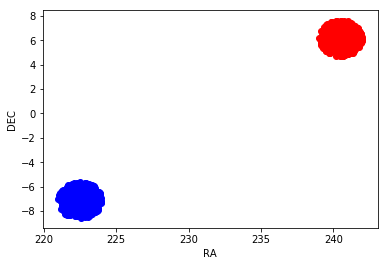

In [15]:
plt.scatter(x,y,color='b')
plt.scatter(x2,y2,color='r')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()
#Plotting the positioning of the two pal5 stream spots

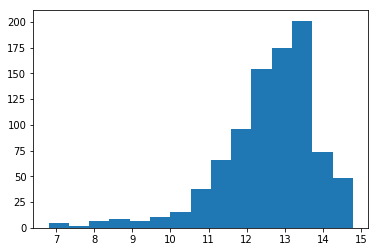

In [16]:
plt.hist(pal5['H'], bins=15)
plt.show()
#Plotting a histogram of their H magnitudes

In [17]:
gaia_pal5 = Table.read('gaia_pal5.csv', format='ascii')
#Reading in the pal5 data that was cross matched gaia DR2 data to get the gaia proper motions 

In [21]:
total_pal5 = join(pal5, gaia_pal5, keys= ('RA','DEC'), join_type='left')
#Joining the pal5 table with cross matched data.

In [22]:
total_pal5.keep_columns(['RA','DEC','H_1','SNREV_1','VHELIO_AVG_1','ra','dec','pmra','pmdec','pmra_error','pmdec_error','Temp_1','Metallicity_1','Logg_1'])
#Getting rid of all the columns we do not need

In [28]:
pal5_candidates = Table.read('gaia_candidates.csv', format='ascii')
#Reading in the candidates data that was cross matched gaia DR2 data to get the gaia proper motions 

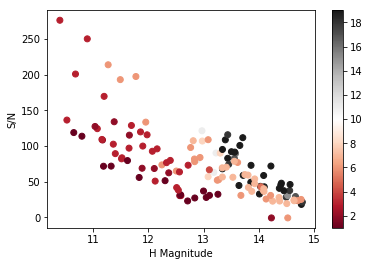

In [24]:
fig, ax = plt.subplots()
im = ax.scatter(candidates['H'], candidates['SNREV'], c=candidates['NVISITS'],cmap="RdGy")
ax.set(xlabel='H Magnitude', ylabel='S/N')
fig.colorbar(im,ax=ax)
fig.savefig('Pal5_HvsSN',format='png')
#Scatter plot of H magnitude vs. S/N with a colorbar set on number of visits

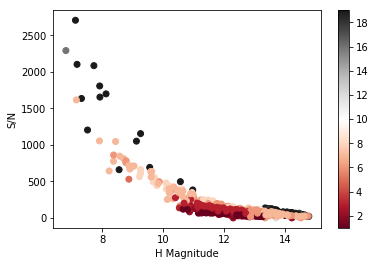

In [25]:
fig, ax = plt.subplots()
im1 = ax.scatter(pal5['H'], pal5['SNREV'], c=pal5['NVISITS'],cmap="RdGy")
ax.set(xlabel='H Magnitude', ylabel='S/N')
fig.colorbar(im1,ax=ax)
#Same plot as above except for the entire pal5 table

In [26]:
total_candidates = join(candidates, pal5_candidates, keys= ('RA','DEC'), join_type='left')
#

In [27]:
total_candidates.keep_columns(['RA','DEC','H_1','SNREV_1','VHELIO_AVG_1', 'NVISITS_1','ra','dec','pmra','pmdec','pmra_error','pmdec_error','Temp','Metallicity','Logg'])
#Getting rid of all the columns we do not need